In [1]:

import numpy as np
import pylab as pl
import astropy
import galpy
import astropy.units as u
from galpy.orbit import Orbit
import galpy.util.coords as coords
from galpy.potential import MWPotential2014




Loading the CSV file into a python array. The CSV file is the Gaia 100-pc white dwarf sample that was classified by [Torres et al. 2019, MNRAS, 485, 5573-5589](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.5573T/abstract)) with a random forest algorithm.

In [2]:
np.random.seed(0)

# for local files, just use this function #
R = np.genfromtxt('../data/Gaia_100pcWD.csv', delimiter=',', names=True, dtype=None, encoding="ASCII")
print(R.dtype)

# masking the galactic components by using the lable defined by Torres et al.
mask_thin = np.where(R['Ilabel_0thin1thick2halo']==0)
mask_thick = np.where(R['Ilabel_0thin1thick2halo']==1)
mask_halo = np.where(R['Ilabel_0thin1thick2halo']==2)



[('Source_ID', '<U28'), ('Name', '<U19'), ('Random_number', '<i8'), ('RA_deg', '<f8'), ('DEC_deg', '<f8'), ('parallax_mas', '<f8'), ('pmramasyr', '<f8'), ('pmdec_masyr', '<f8'), ('phot_g_mean_mag', '<f8'), ('phot_bp_mean_mag', '<f8'), ('phot_rp_mean_mag', '<f8'), ('bp_rp', '<f8'), ('bp_g', '<f8'), ('g_rp', '<f8'), ('M_g', '<f8'), ('U_kms', '<f8'), ('V_kms', '<f8'), ('W_kms', '<f8'), ('Ilabel_0thin1thick2halo', '<i8')]


We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps
And finally we integrate the orbits.

In [3]:
R0, z0, V0, v_sun = 8.122*u.kpc, 0.0208*u.kpc, 235.*u.km/u.s, [12.9, 10.6, 7.78]*u.km / u.s

star_thin = R[mask_thin]
star_thick = R[mask_thick]
star_halo = R[mask_halo]


ts = np.linspace(0,0.125,10000)*u.Gyr

o_thin = Orbit([star_thin['RA_deg'][0],star_thin['DEC_deg'][0],1/star_thin['parallax_mas'][0],
                star_thin['pmramasyr'][0],star_thin['pmdec_masyr'][0], 0.],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit([star_thick['RA_deg'][10],star_thick['DEC_deg'][10],1/star_thick['parallax_mas'][10],
                star_thick['pmramasyr'][10],star_thick['pmdec_masyr'][10], 0.],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit([star_halo['RA_deg'][-1],star_halo['DEC_deg'][-1],1/star_halo['parallax_mas'][-1],
                star_halo['pmramasyr'][-1],star_halo['pmdec_masyr'][-1], 0.],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)

### integrate all ###
a_thin = Orbit([star_thin['RA_deg'][0:5000],star_thin['DEC_deg'][0:5000],1/star_thin['parallax_mas'][0:5000],
                star_thin['pmramasyr'][0:5000],star_thin['pmdec_masyr'][0:5000], np.zeros(len(star_thin[0:5000]))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thin.integrate(ts,MWPotential2014)

a_thick = Orbit([star_thick['RA_deg'],star_thick['DEC_deg'],1/star_thick['parallax_mas'],
                star_thick['pmramasyr'],star_thick['pmdec_masyr'], np.zeros(len(star_thick))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thick.integrate(ts,MWPotential2014)

a_halo = Orbit([star_halo['RA_deg'],star_halo['DEC_deg'],1/star_halo['parallax_mas'],
                star_halo['pmramasyr'],star_halo['pmdec_masyr'], np.zeros(len(star_halo))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_halo.integrate(ts,MWPotential2014)

# printing eccentricity and angular momentum (z component)
print('e = ', round(o_thin.e(),3), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', round(o_thick.e(),3), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', round(o_halo.e(),3), 'Lz = ', o_halo.Lz(quantity=True))


e =  0.079 Lz =  2043.2308341223043 km kpc / s
e =  0.203 Lz =  1721.3925753403396 km kpc / s
e =  0.377 Lz =  -1531.2100611279454 km kpc / s


Plotting the Toomre diagram of the Full sample.

/var/folders/hj/93g2dpgj78s9f05h5s0b10mw0000gn/T/ipykernel_82091/521299742.py:6: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(star_thick['V_kms'],np.sqrt(star_thick['U_kms']**2 + star_thick['W_kms']), marker='.', ms=3, ls='none', label='thick disk')

/var/folders/hj/93g2dpgj78s9f05h5s0b10mw0000gn/T/ipykernel_82091/521299742.py:7: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(star_thin['V_kms'],np.sqrt(star_thin['U_kms']**2 + star_thin['W_kms']), marker='.', ms=3, ls='none', label='thin disk')



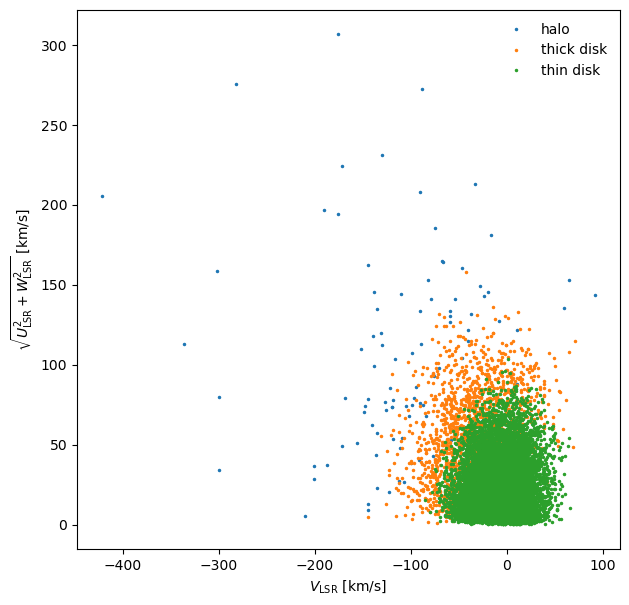

In [4]:

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(star_halo['V_kms'],np.sqrt(star_halo['U_kms']**2 + star_halo['W_kms']), marker='.', ms=3, ls='none', label='halo')
ax1.plot(star_thick['V_kms'],np.sqrt(star_thick['U_kms']**2 + star_thick['W_kms']), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(star_thin['V_kms'],np.sqrt(star_thin['U_kms']**2 + star_thin['W_kms']), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)


pl.show()


Plotting the orbits

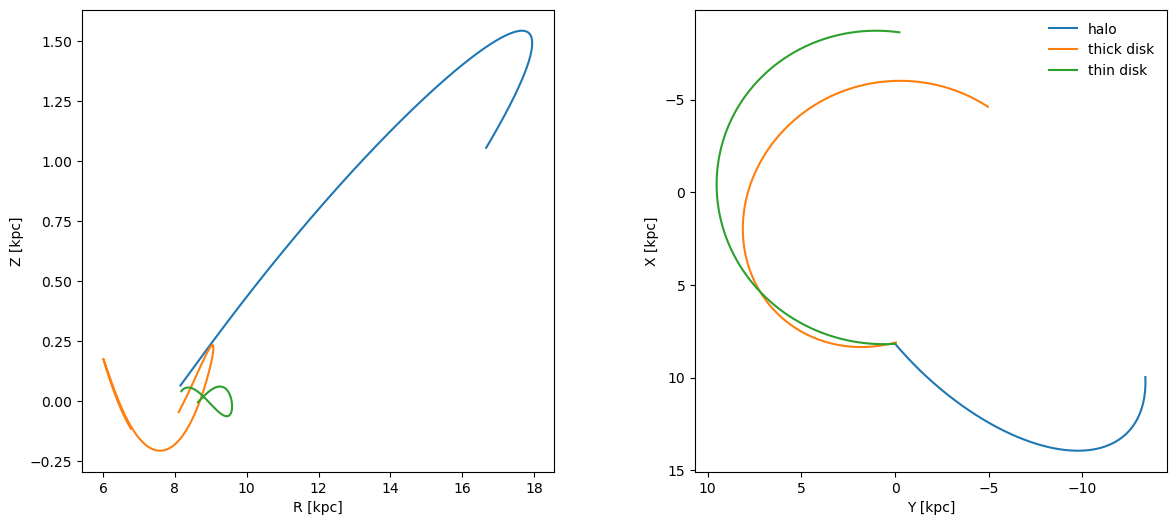

In [5]:
fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))


ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_xaxis()
ax2.invert_yaxis()
pl.show()


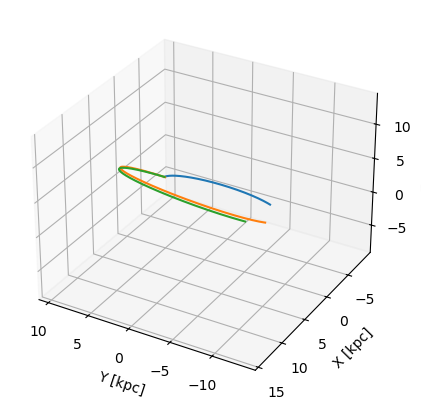

In [6]:
fig = pl.figure(figsize=(5,5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(projection='3d')

ax1.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), o_halo.x(ts,quantity=True), label='halo')
ax1.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), o_thick.x(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), o_thin.x(ts,quantity=True), label='thin disk')


ax1.set_xlabel('Y [kpc]')
ax1.set_ylabel('X [kpc]')
ax1.set_zlabel('Z [kpc]')

ax1.invert_xaxis()
ax1.invert_yaxis()
pl.show()

Plotting vertical component of angular momentum (Lz) vs orbital eccentricity.

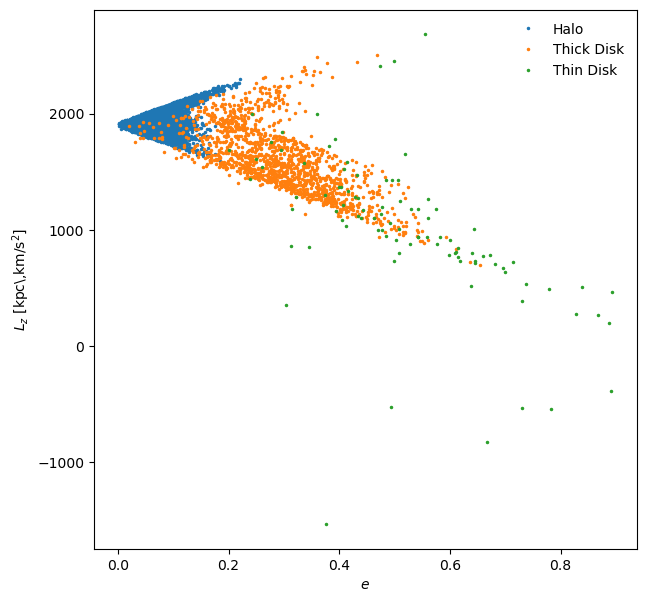

In [7]:

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(a_thin.e(),a_thin.Lz(), marker='.', ms=3, ls='none', label='Halo')
ax1.plot(a_thick.e(),a_thick.Lz(), marker='.', ms=3, ls='none', label='Thick Disk')
ax1.plot(a_halo.e(),a_halo.Lz(), marker='.', ms=3, ls='none', label='Thin Disk')

ax1.set_xlabel(r'$e$')
ax1.set_ylabel(r'$L_z$ [kpc\,km/s$^2$]')

pl.legend(frameon=False)


pl.show()

Integrating for longer and plotting the orbits

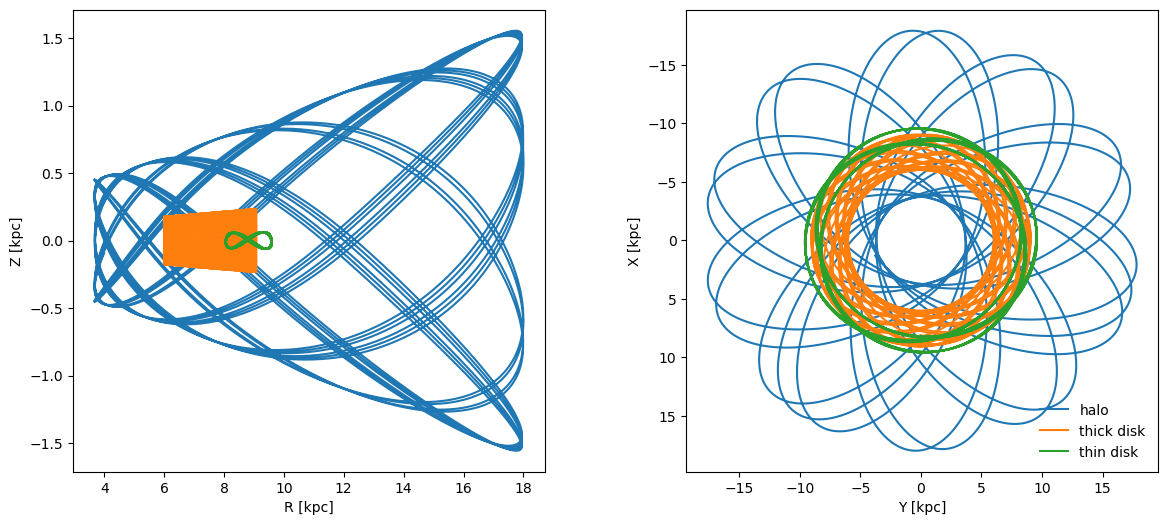

In [8]:
ts = np.linspace(0,5,10000)*u.Gyr


o_thin.integrate(ts,MWPotential2014)

o_thick.integrate(ts,MWPotential2014)

o_halo.integrate(ts,MWPotential2014)



fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_yaxis()
pl.show()




Plotting the Galactic radial velocity component:

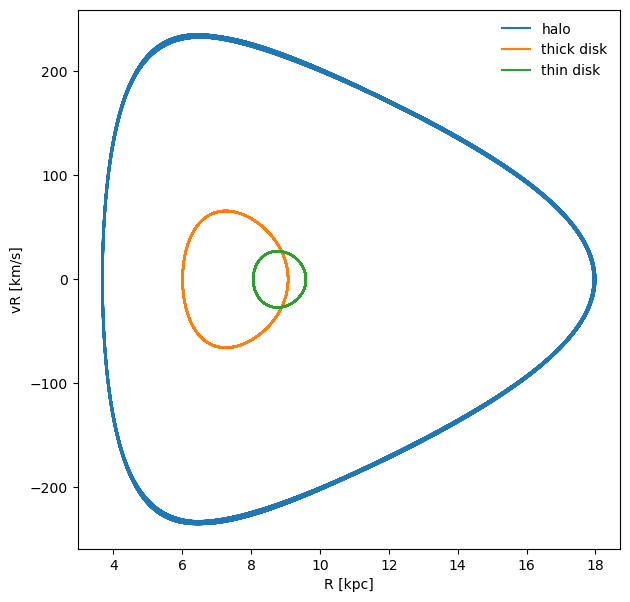

In [9]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.vR(ts,quantity=True), label='halo')
ax1.plot(o_thick.R(ts,quantity=True),o_thick.vR(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.R(ts,quantity=True),o_thin.vR(ts,quantity=True), label='thin disk')

pl.legend(frameon=False)

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('vR [km/s]')
pl.show()